<a href="https://www.kaggle.com/code/fluloeo/sum-art?scriptVersionId=290819556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import ast


/kaggle/input/articles/df_dict_test.csv


**Роман мне скинул чанки, сделанные парсером, я очень доволен!!**

In [2]:
df = pd.read_csv('/kaggle/input/articles/df_dict_test.csv')
df

,id,title,abstract,dict_test
0,1602.04402,balanced truncation of linear time-invariant s...,this paper discusses model order reduction of ...,{'I. INTRODUCTION AND PROBLEM FORMULATIONS': '...
1,1611.01462,tying word vectors and word classifiers: a los...,recurrent neural networks have been very succe...,"{'INTRODUCTION': ""Neural network models have r..."
2,1611.04496,multi-view recurrent neural acoustic word embe...,recent work has begun exploring neural acousti...,{'INTRODUCTION': 'Word embeddings-continuous-v...
3,1808.00560,compressible spectral mixture kernels with spa...,spectral mixture (sm) kernels comprise a power...,"{'Introduction': ""Gaussian processes (GPs) con..."
4,2111.00405,limitations of the macaulay matrix approach fo...,recently chen and gao~\cite{chengao2017} propo...,{'Introduction': 'Solving systems of multivari...
...,...,...,...,...
95,2307.14341,virtual mirrors: non-line-of-sight imaging bey...,non-line-of-sight (nlos) imaging methods are c...,{'Computed image of': 'T-shaped object from a ...
96,2307.14354,learned gridification for efficient point clou...,neural operations that rely on neighborhood in...,{'Introduction': 'Point clouds provide sparse ...
97,2307.14362,learnable wavelet neural networks for cosmolog...,convolutional neural networks (cnns) have been...,{'Introduction': 'The process of extracting in...
98,2307.14392,human-centric scene understanding for 3d large...,human-centric scene understanding is significa...,{'Introduction': 'Human-centric scene understa...


*Пример для одной статьи:*

In [40]:
data_dict = ast.literal_eval(df['dict_test'].iloc[0])
print(*data_dict.keys(),sep='\n')
print(f'Количество чанков: {len(data_dict.keys())}',end='\n\n')

for key, value in data_dict.items():
    print(key,end='\n\n')
    print(value,end='\n\n')



I. INTRODUCTION AND PROBLEM FORMULATIONS
DRAFT
II. FUNDAMENTAL TOOL
IV. FREQUENCY-DEPENDENT BALANCED TRUNCATION OVER KNOWN FREQUENCY-INTERVALS
Theorem 4.4 (Interval-type Frequency-dependent Balanced Truncation):
, n
V. EXAMPLES
Indexes computation formula
Berlin/Heidelberg, Germany
Количество чанков: 9

I. INTRODUCTION AND PROBLEM FORMULATIONS

We study model order reduction for linear time-invariant continuous-time systems where A ∈ C n×n , B ∈ C n×m , C ∈ C p×n , D ∈ C p×m , x(t) ∈ C n is the state vector, u(t) ∈ C m is the input signal, y(t) ∈ C p is the output signal. Modeling of complex physical processes often leads to large order n. The corresponding high storage requirements and expensive computations make it very difficult to simulate, optimize or even design such large scale systems - . In this case model order reduction (MOR) plays an important role. It consists in approximating the system (1) by a reduced-order system: G r (ω) : 1 Max Planck Institute for Dynamics of Compl

In [9]:
!pip install -U bitsandbytes accelerate transformers -q
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-4B-Instruct-2507")
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen3-4B-Instruct-2507",
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

torch.cuda.empty_cache()
!pip install langchain==0.0.208  -q
from langchain.text_splitter import RecursiveCharacterTextSplitter
!pip install rouge-score evaluate -q
from rouge_score import rouge_scorer
import evaluate
rouge = evaluate.load('rouge')

!pip install bert-score -q
from bert_score import BERTScorer

scorer = BERTScorer(lang="en", model_type="bert-base-multilingual-cased")

!pip install longdocfactscore -q
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from longdocfactscore.ldfacts import LongDocFACTScore
ldfacts_scorer = LongDocFACTScore(device=device)
from tqdm.notebook import tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.1 MB/s eta 0:00:0000:0100:01
cuda


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

2026-01-08 18:08:20.891349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767895701.241712      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767895701.331492      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767895702.415966      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767895702.415992      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767895702.415995      55 computation_placer.cc:177] computation placer alr

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.4 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 100.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 94.2 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
sigstore 4.1.0 requires pydantic<3,>=2, but you have pydantic 1.10.26 which is incompatible.
sigstore-models 0.0.5 requires pydantic>=2.11.7, but 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Функция для того чтобы отправить инструкцию модели

In [31]:
def qwen(article, prompt, max_tokens):
    torch.cuda.empty_cache()
    final_prompt = f"{prompt}:\n\n{article}"
    messages = [{"role": "user", "content": final_prompt}]
    model.eval()
    with torch.no_grad():
        inputs = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=True,
            return_dict=True,
            return_tensors="pt",
            truncation=False
        ).to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            do_sample=False
        )
    final_summary = tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:], skip_special_tokens=True)
    return final_summary

Функция для обработки чанков статьи, встроенный text_splitter можно отключить

In [48]:
def summarize(article, prompt_0, prompt_1,chunk_size=1500, max_tokens_0=700, max_tokens_1=700, text_splitter = True):
    torch.cuda.empty_cache()
    if text_splitter:
        text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
            tokenizer=tokenizer,
            chunk_size=chunk_size,
            chunk_overlap=chunk_size//20,
            separators=["\n\n", "\n", ". "],
            keep_separator=True
        )
        article_chunks = text_splitter.split_text(article)
    else:
        article_chunks = article
    summaries = []
    for i, chunk in tqdm(enumerate(article_chunks), total=len(article_chunks)):
        try:
            chunk_summary = qwen(article=chunk, prompt=prompt_0, max_tokens=max_tokens_0)
            print(f"\nSummary chunk number {i}")
            print(chunk_summary)
        except torch.cuda.OutOfMemoryError as e:
            print(f"⚠️ Ошибка нехватки памяти CUDA, слишком длинный чанк: {str(e)[:100]}...")
            break

        summaries.append(chunk_summary)
        torch.cuda.empty_cache()
    combined_summary = "\n".join(summaries)
    
    try:
        final_summary = qwen(article=combined_summary, prompt=prompt_1, max_tokens=max_tokens_1)
    except torch.cuda.OutOfMemoryError as e:
        print(f"⚠️ Ошибка нехватки памяти CUDA при итоговой суммаризации: {str(e)[:100]}...")
    return final_summary

In [49]:
rouge_list = []
bert_list = []
ldfacts_list = []
summaries_list = []

def to_full_text(data_dict):
    text = ''
    for key, value in data_dict.items(): 
        text += f"{key}\n\n{value}\n\n"
    return text


for i in range(5):
    print(f"\n=== Статья {i} ===")
    #извлекаем чанки, абстракт, названия разделов
    article_dict = ast.literal_eval(df['dict_test'].iloc[i]) #словарь для i-той статьи 
    chunked_article = list(article_dict.values()) #список чанков
    chapters_list = list(article_dict.keys()) #список глав
    print('Список разделов')
    display(pd.DataFrame(chapters_list))
    abstract = df['abstract'].iloc[i] 
    article = to_full_text(article_dict) #полный текст статьи с ключами и значениями словаря
    
    print(f"Токенов в статье: {len(tokenizer.encode('\n'.join(chunked_article)))}")
    prompt_0 = "You're a science editor. Briefly summarize this fragment of the scientific text in original language. Do not add information that is not in the source texts"
    prompt_1 = "You're a science editor. Based on the following summaries of the parts of the article, create a single, coherent and concise summary of the entire scientific article in original language, highlighting the common goal, methods, key results and conclusion. Do not add information that is not in the source texts"
    
    summary_full = summarize(chunked_article, prompt_0 = prompt_0, prompt_1 = prompt_1, max_tokens_0 = 500, max_tokens_1 = 700, text_splitter = False)
    print(f'\nSummary article number {i}')
    print(summary_full)
    summaries_list.append({
        'article_id': i,
        'original_text': article,
        'abstract': abstract,
        'summary': summary_full
    })

    results = rouge.compute(
    predictions=[summary_full],
    references=[article],
    use_stemmer=True
    )
    print("ROUGE Metrics:")

    rouge_dict = {}
    for key, value in results.items():
        print(f"{key}: {value:.4f}")
        rouge_dict[key] = value
    rouge_list.append(rouge_dict)

    _, _, F1 = scorer.score([summary_full], [abstract])
    bert_f1 = F1.item()
    print(f"\nBERTScore: F1 = {bert_f1:.4f}")
    bert_list.append(bert_f1)

    ldfacts_sum = ldfacts_scorer.score_src_hyp_long([article], [summary_full])
    ldfacts_abs = ldfacts_scorer.score_src_hyp_long([article], [abstract])
    print(f"LongDocFACTScore for sum: {ldfacts_sum[0]}")
    print(f"LongDocFACTScore for abstract: {ldfacts_abs[0]}")
    ldfacts_list.append({
        'for_summary': ldfacts_sum[0],
        'for_abstract': ldfacts_abs[0]
    })


=== Статья 0 ===
Список разделов


,0
0,I. INTRODUCTION AND PROBLEM FORMULATIONS
1,DRAFT
2,II. FUNDAMENTAL TOOL
3,IV. FREQUENCY-DEPENDENT BALANCED TRUNCATION OV...
4,Theorem 4.4 (Interval-type Frequency-dependent...
5,", n"
6,V. EXAMPLES
7,Indexes computation formula
8,"Berlin/Heidelberg, Germany"


Токенов в статье: 6903


  0%|          | 0/9 [00:00<?, ?it/s]


Summary chunk number 0
We study model order reduction for linear time-invariant continuous-time systems with state vector \( x(t) \in \mathbb{C}^n \), input \( u(t) \in \mathbb{C}^m \), and output \( y(t) \in \mathbb{C}^p \), described by matrices \( A \in \mathbb{C}^{n\times n} \), \( B \in \mathbb{C}^{n\times m} \), \( C \in \mathbb{C}^{p\times n} \), \( D \in \mathbb{C}^{p\times m} \). Large system orders \( n \) lead to high computational and storage costs, making simulation, optimization, and design challenging. Model order reduction (MOR) is thus essential to approximate the system by a reduced-order model \( G_r(j\omega) \) with \( r < n \). Balanced truncation, particularly Lyapunov balanced truncation introduced by Moore, is widely used due to its stability preservation and a priori error bounds over the entire frequency range. However, in practical applications where input signals operate within a known finite frequency range \( \omega \in [\omega_1, \omega_2] \), the object

,0
0,INTRODUCTION
1,BACKGROUND: RECURRENT NEURAL NETWORK LANGUAGE ...
2,AUGMENTING THE CROSS-ENTROPY LOSS
3,THEORETICALLY DRIVEN REUSE OF WORD EMBEDDINGS
4,RELATED WORK
5,EXPERIMENTS
6,MODEL AND TRAINING HIGHLIGHTS
7,EMPIRICAL VALIDATION FOR THE THEORY OF REUSING...
8,RESULTS ON PTB AND WIKITEXT-2 DATASETS
9,QUALITATIVE RESULTS


Токенов в статье: 5944


  0%|          | 0/14 [00:00<?, ?it/s]


Summary chunk number 0
Neural network models have made significant advances in NLP tasks like speech recognition, sentiment analysis, text summarization, and machine translation. Although recurrent neural networks excel at modeling long-range word dependencies, current RNNLMs rely on a classical classification framework with two key limitations: (1) no natural metric is assumed on output classes, despite the existence of a well-defined metric space in language modeling via word embeddings; and (2) inputs and outputs are treated as isolated, whereas in language modeling they reside in the same space, leading to inefficiency in model complexity and information utilization. To address these issues, we propose a novel loss framework comprising two interlinked improvements: (1) augmenting cross-entropy loss with a term that minimizes KL-divergence between model predictions and a target distribution derived from word embedding similarities; and (2) theoretically analyzing this loss leads to

,0
0,INTRODUCTION
1,OUR APPROACH
2,MULTI-VIEW LEARNING OF ACOUSTIC WORD EMBEDDINGS
3,RECURRENT NEURAL NETWORK ARCHITECTURE
4,RELATED WORK
5,EXPERIMENTS AND RESULTS
6,DATA
7,MODEL DETAILS AND HYPERPARAMETER TUNING
8,EFFECTS OF DIFFERENT OBJECTIVES
9,Objective


Токенов в статье: 6253


  0%|          | 0/19 [00:00<?, ?it/s]


Summary chunk number 0
Word embeddings—continuous vector representations of words—are widely used in natural language processing. They can be learned via spectral methods or neural networks and are often composed to represent phrases, sentences, or documents. While most embeddings capture semantic meaning, few represent the acoustic characteristics of words. This work introduces a multi-view approach to learn embeddings that capture how words sound, using both acoustic and orthographic sequences. By jointly learning embeddings from matched and mismatched acoustic-orthographic pairs using contrastive losses, the method enables direct comparison between acoustic and orthographic embeddings. The approach improves performance in acoustic word discrimination and shows promising results in cross-view tasks and word similarity, offering a more effective alternative to sequence-based methods like dynamic time warping.

Summary chunk number 1
In this section, we first introduce our approach fo

,0
0,Introduction
1,Background and related work
2,Gaussian processes
3,Spectral mixture kernels
4,Related work
5,Motivation
6,Spectral mixture kernel with dependency structure
7,Modeling dependency structure using convolution
8,Time and phase characterized Gaussian spectral...
9,Time-and phase modulated dependency structure


Токенов в статье: 8151


  0%|          | 0/26 [00:00<?, ?it/s]


Summary chunk number 0
Gaussian processes (GPs) are Bayesian nonparametric models that model functions using a Gaussian prior and compute the posterior distribution given observations. They can learn function approximations well with sufficient data and avoid overfitting with limited data. The choice of kernel function—reflecting the system’s autocovariance—is crucial for GP performance, as it determines the model’s representation ability and posterior behavior. Typically, kernel selection relies on expert knowledge and empirical analysis. While several base kernels and their combinations exist for applications like RSS-based modeling and traffic prediction, automatic and generalized kernel design is needed to reduce human intervention. The spectral mixture (SM) kernel, which models a signal’s spectral density with a sum of Gaussians, has been successfully applied in various domains. Recent advances focus on extending SM kernels rather than modeling latent dependencies between compone

,0
0,Introduction
1,Macaulay linear systems and their tQLScn
2,Macaulay linear systems
3,Lower bound on the truncated QLS condition num...
4,Comparison to brute-force search
5,The Boolean Macaulay linear system and its tQLScn
6,The Boolean Macaulay matrix over C
7,Definition 5.1. The Boolean Macaulay matrix B ...
8,Lower bound on the tQLScn κ
9,Details comparing running times


Токенов в статье: 13917


  0%|          | 0/16 [00:00<?, ?it/s]


Summary chunk number 0
Solving systems of multivariate polynomial equations over \( \mathbb{F}_2 \) is NP-complete. This problem can be reduced to solving an exponentially large system of linear equations using the Macaulay matrix, which encodes the polynomials and their monomial multiples. The classical approach involves computing a Gröbner basis via triangularization of the Macaulay matrix. Chen and Gao proposed applying the HHL quantum linear system (QLS) algorithm to solve this system, avoiding explicit Gröbner basis computation. They demonstrated that the standard access requirements—efficient preparation of \( |b\rangle \), extraction of the solution, and sparse well-conditioned matrix access—can be satisfied. However, the condition number \( \kappa \) of the resulting matrix was not analyzed, and its exponential growth in worst-case instances suggests exponential time complexity for the quantum algorithm. The authors prove an exponential lower bound on \( \kappa \) for Boolean 

In [50]:
print("\n--- ROUGE Metrics (средние значения) ---")
for key in rouge_list[0].keys():
    avg = sum(r[key] for r in rouge_list) / len(rouge_list)
    print(f"{key}: {avg:.4f}")

avg_bert = sum(bert_list) / len(bert_list)
print(f"\n--- BERTScore F1 (среднее): {avg_bert:.4f} ---")

avg_sum = sum(l['for_summary'] for l in ldfacts_list) / len(ldfacts_list)
avg_abs = sum(l['for_abstract'] for l in ldfacts_list) / len(ldfacts_list)

print(f"\n--- LongDocFACTScore (средние) ---")
print(f"Для суммаризаций: {avg_sum:.4f}")
print(f"Для абстрактов: {avg_abs:.4f}")


--- ROUGE Metrics (средние значения) ---
rouge1: 0.0962
rouge2: 0.0468
rougeL: 0.0575
rougeLsum: 0.0821

--- BERTScore F1 (среднее): 0.6998 ---

--- LongDocFACTScore (средние) ---
Для суммаризаций: -4.5227
Для абстрактов: -4.5579


*С text_splitter:*

я забыл сохранить переменную summaries_list прежде чем запустить следующую ячейку :))))))

In [53]:
rouge_list = []
bert_list = []
ldfacts_list = []
summaries_list = []

for i in range(5):
    print(f"\n=== Статья {i} ===")
    #извлекаем чанки, абстракт, названия разделов
    article_dict = ast.literal_eval(df['dict_test'].iloc[i]) #словарь для i-той статьи 
    chunked_article = list(article_dict.values()) #список чанков
    # chapters_list = list(article_dict.keys()) #список глав
    # print('Список разделов')
    # display(pd.DataFrame(chapters_list))
    abstract = df['abstract'].iloc[i] 
    article = to_full_text(article_dict) #полный текст статьи с ключами и значениями словаря
    
    print(f"Токенов в статье: {len(tokenizer.encode('\n'.join(chunked_article)))}")
    prompt_0 = "You're a science editor. Briefly summarize this fragment of the scientific text in original language. Do not add information that is not in the source texts"
    prompt_1 = "You're a science editor. Based on the following summaries of the parts of the article, create a single, coherent and concise summary of the entire scientific article in original language, highlighting the common goal, methods, key results and conclusion. Do not add information that is not in the source texts"
    
    summary_full = summarize(article, prompt_0 = prompt_0, prompt_1 = prompt_1,chunk_size = 1500, max_tokens_0 = 500, max_tokens_1 = 700, text_splitter = True)
    print(f'\nSummary article number {i}')
    print(summary_full)
    summaries_list.append({
        'article_id': i,
        'original_text': article,
        'abstract': abstract,
        'summary': summary_full
    })

    results = rouge.compute(
    predictions=[summary_full],
    references=[article],
    use_stemmer=True
    )
    print("ROUGE Metrics:")

    rouge_dict = {}
    for key, value in results.items():
        print(f"{key}: {value:.4f}")
        rouge_dict[key] = value
    rouge_list.append(rouge_dict)

    _, _, F1 = scorer.score([summary_full], [abstract])
    bert_f1 = F1.item()
    print(f"\nBERTScore: F1 = {bert_f1:.4f}")
    bert_list.append(bert_f1)

    ldfacts_sum = ldfacts_scorer.score_src_hyp_long([article], [summary_full])
    ldfacts_abs = ldfacts_scorer.score_src_hyp_long([article], [abstract])
    print(f"LongDocFACTScore for sum: {ldfacts_sum[0]}")
    print(f"LongDocFACTScore for abstract: {ldfacts_abs[0]}")
    ldfacts_list.append({
        'for_summary': ldfacts_sum[0],
        'for_abstract': ldfacts_abs[0]
    })


=== Статья 0 ===
Токенов в статье: 6903


  0%|          | 0/9 [00:00<?, ?it/s]


Summary chunk number 0
The text introduces model order reduction (MOR) for linear time-invariant continuous-time systems with large order n, which poses challenges in simulation and design due to high computational cost. Balanced truncation is a standard MOR method that preserves stability and provides an a priori error bound over the entire frequency range. However, in practical applications where input signals operate within a known finite frequency range (e.g., ω ∈ [ω₁, ω₂]), the focus shifts to minimizing a finite-frequency performance index. Standard balanced truncation (called frequency-independent balanced truncation, FIBT) is not optimal for such cases. To improve in-band approximation, several balancing-related methods are discussed: (1) Singular perturbation approximation (SPA), which matches the transfer function at ω = 0 and is suitable when zero frequency is the dominant operating point; generalized SPA allows adjustable trade-offs between low- and high-frequency performa

  0%|          | 0/5 [00:00<?, ?it/s]


Summary chunk number 0
The fragment introduces a novel loss framework for recurrent neural network language models (RNNLMs) aimed at addressing two limitations of the classical classification framework: (1) the absence of a natural metric on output classes, and (2) the separation of inputs and outputs with no semantic link. The proposed framework augments the standard cross-entropy loss with a term that minimizes the Kullback-Leibler divergence between the model's prediction and an estimated target distribution derived from word embeddings. This estimated distribution leverages word vector similarities to define a meaningful metric space among words. The framework further includes a synergistic improvement by reusing the input word embedding matrix as the output classification matrix, reducing model complexity and improving information utilization. Theoretical analysis supports this design, and empirical validation on the Penn Treebank and Wikitext-2 datasets shows that models trained

  0%|          | 0/6 [00:00<?, ?it/s]


Summary chunk number 0
Word embeddings are widely used in natural language processing to represent words as continuous vectors. While most existing work focuses on semantic representations, this paper addresses the problem of learning embeddings that capture the acoustic characteristics of words. The authors propose a multi-view approach that jointly learns embeddings from both acoustic (audio) and orthographic (character) sequences of words. Using contrastive losses based on matched and mismatched pairs of acoustic and orthographic sequences, the method aims to ensure that embeddings are close for the same word and far for different ones, or that distances reflect orthographic edit distances. A key advantage is that the multi-view approach enables direct comparison between acoustic and orthographic embeddings, allowing the same learned representations to be used across various tasks. The method outperforms prior work on acoustic word discrimination and shows promising results in cros

  0%|          | 0/7 [00:00<?, ?it/s]


Summary chunk number 0
Gaussian processes (GPs) are Bayesian nonparametric models that model functions using a Gaussian prior and compute the posterior distribution given observations. They can learn function approximations well with sufficient data and avoid overfitting with limited data. The choice of kernel function, which defines the autocovariance structure, is crucial for GP performance and is typically selected based on expert knowledge. The spectral mixture (SM) kernel, which models the spectral density of a stationary signal as a sum of Gaussians, has been successfully applied in various domains. Existing variants of SM kernels—such as the SM product (SMP), nonstationary SM (NSM), and grid SM (GSM)—extend the model to handle image, spatial, and input-dependent data but fail to explicitly represent dependency structures between SM components. This paper proposes a new SM kernel with dependency structure (SMD), modeling inter-component dependencies via a generalized cross covar

  0%|          | 0/19 [00:00<?, ?it/s]


Summary chunk number 0
The Introduction section provides background information on the scientific problem being addressed, outlines the objectives of the study, and reviews relevant prior research to establish the context and significance of the work presented.

Summary chunk number 1
Solving systems of multivariate polynomial equations over F₂ is NP-complete. This problem can be reduced to solving an exponential number of linear equations using the Macaulay matrix, which encodes polynomial equations and their monomial multiples as linear equations. The classical approach involves computing the Gröbner basis via triangularization of the Macaulure matrix. In quantum computing, the HHL algorithm solves large linear systems and has been applied to the Macaulay matrix, with Chen and Gao showing that the access requirements for the system (state preparation, data extraction, sparsity, conditioning) can be met. However, the condition number κ of the resulting matrix was not analyzed. This p

In [54]:
print("\n--- ROUGE Metrics (средние значения) ---")
for key in rouge_list[0].keys():
    avg = sum(r[key] for r in rouge_list) / len(rouge_list)
    print(f"{key}: {avg:.4f}")

avg_bert = sum(bert_list) / len(bert_list)
print(f"\n--- BERTScore F1 (среднее): {avg_bert:.4f} ---")

avg_sum = sum(l['for_summary'] for l in ldfacts_list) / len(ldfacts_list)
avg_abs = sum(l['for_abstract'] for l in ldfacts_list) / len(ldfacts_list)

print(f"\n--- LongDocFACTScore (средние) ---")
print(f"Для суммаризаций: {avg_sum:.4f}")
print(f"Для абстрактов: {avg_abs:.4f}")


--- ROUGE Metrics (средние значения) ---
rouge1: 0.0960
rouge2: 0.0485
rougeL: 0.0566
rougeLsum: 0.0811

--- BERTScore F1 (среднее): 0.6980 ---

--- LongDocFACTScore (средние) ---
Для суммаризаций: -4.4542
Для абстрактов: -4.5579


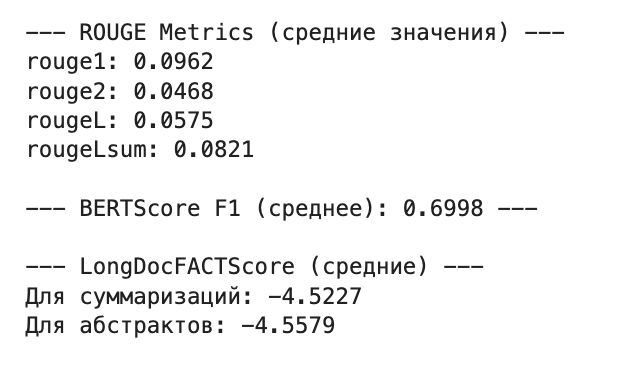

различия несущественные, но эти метрики все равно неинформативны